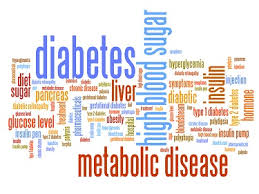

# Diabetes
It is a chronic (long-lasting) health condition that affects how your body turns food into energy.

Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.

If you have diabetes, your body either doesn’t make enough insulin or can’t use the insulin it makes as well as it should. When there isn’t enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.

### import libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import itertools

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
diabetes = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

### data wrangling

In [ ]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [ ]:
columns=diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diabetes[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [ ]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x:(x - x.min())/(x.max()-x.min()))

In [ ]:
diabetes

In [ ]:
diabetes.columns

In [ ]:
diabetes.isnull().any()

In [ ]:
sns.countplot(x='Outcome',data=diabetes)
plt.show()

####  defining feature columns

In [ ]:
Pregnan=tf.feature_column.numeric_column('Pregnancies')
Gluco=tf.feature_column.numeric_column('Glucose')
BloodPre=tf.feature_column.numeric_column('BloodPressure')
SkinThi=tf.feature_column.numeric_column('SkinThickness')
Insu=tf.feature_column.numeric_column('Insulin')
BMI=tf.feature_column.numeric_column('BMI')
DiabPedi=tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age=tf.feature_column.numeric_column('Age')

In [ ]:
# another way for categorical data
#assigned_group= tf.feature_column.categorical_column_with_hash_bucket('group', hash_bucket_size=10)

In [ ]:
diabetes['Age'].hist(bins=20)

In [ ]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [ ]:
feat_cols= [Pregnan,Gluco,BloodPre,SkinThi,Insu,BMI,DiabPedi,age_bucket]

In [ ]:
age_bucket

# Classifying data in Train Test using Train Test Split

In [ ]:
labels = diabetes.pop('Outcome')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes,labels,test_size=.3,random_state=101)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

#### putting input using input_func into tf.estimator.LinearClassifier

In [ ]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y= y_train, batch_size=10,num_epochs=1000, shuffle=True)

In [ ]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2) 

In [ ]:
modelDNN =tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols)

In [ ]:
model.train(input_fn= input_func,steps=1000)

In [ ]:
modelDNN.train(input_fn= input_func,steps=1000)

#### Evaluating the data and checking the accuracy

In [ ]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [ ]:
results=model.evaluate(eval_input_func)

In [ ]:
resultsDNN =modelDNN.evaluate(eval_input_func)

In [ ]:
# Accuracy is much better by other models but i just wanted to learn tf.estimator
results


In [ ]:
resultsDNN

In [ ]:
### Now we can put data for predictions 

In [ ]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [ ]:
predictions = model.predict(pred_input_func)

In [ ]:
predictions


In [ ]:
list(predictions)

# the end